In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [1,2]].values #1st and 2nd columns only, user id column is neglected
y = dataset.iloc[:, 3].values  #3rd column

In [4]:
print(x)
print(y)


[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

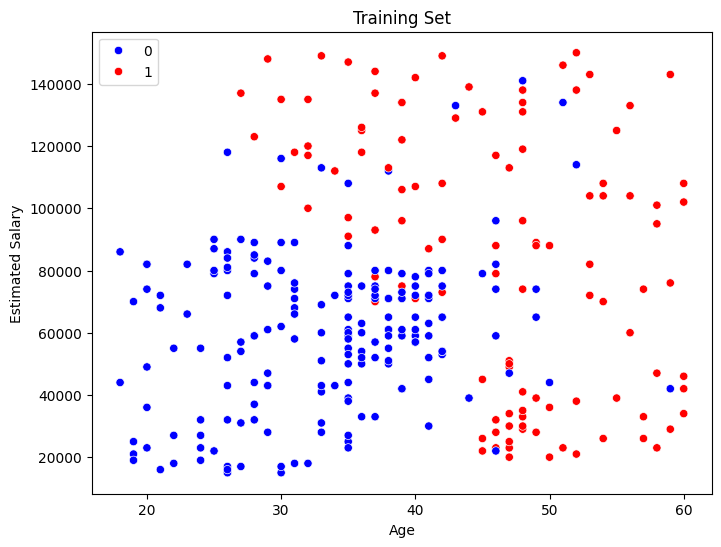

In [6]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train,palette={  #0,1 are columns of trining data set (age and salary), hue depends on whetehr purchased or not.
    0:'blue', 1:'red'}, marker='o')
plt.xlabel('Age') #0 and 1 are indicators of whether purchased or not.
plt.ylabel('Estimated Salary')
plt.title('Training Set')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler #will make the mean of enntire data at zero
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
print(x_train)
print(x_test)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [9]:
#simialr to linear regression will will draw a line bt thi time it will divide the 2 groups
#we willl be using logistic regression, we will be calling it classifier

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [10]:
#to test how good the model is working
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix

In [11]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 89.00%


In [12]:
print("coefficients:", classifier.coef_)
print("intercept:", classifier.intercept_)

coefficients: [[2.07665837 1.11008221]]
intercept: [-0.95217247]


#find whetehr p is 0 or 1 (p = purchase)

p = 2.07665837*age + 1.11008221*salary +(-0.95217247)

if the resultnt value>0 : it will be in the purchased section, else.....

p = 2.07665837*age + 1.11008221*salary +(-0.95217247) = 0
 we get the line equation

2.07665837*x + 1.11008221*y -0.95217247 = 0

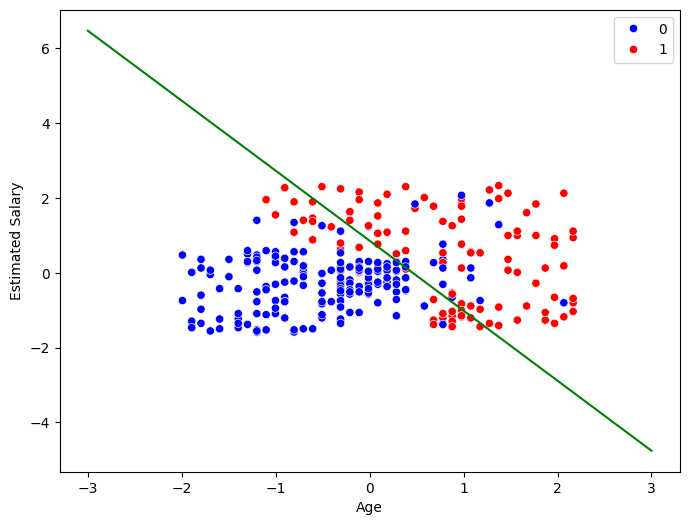

In [13]:
import seaborn as sns

x1 = np.linspace(-3,3,100)
x2 = (-2.07665837*x1 + 0.95217247)/1.11008221

plt.figure(figsize=(8,6))
plt.plot(x1,x2, color='green')
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train,palette={
    0:'blue', 1:'red'}, marker='o')
plt.xlabel('Age') #0 and 1 are indicators of whether purchased or not.
plt.ylabel('Estimated Salary')

plt.show()

what if we could draw a sape other than line to have a bettter ccuracy
#Thus,We use KNN Classifier  (K-Nearest Neighbour)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)



In [15]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict  (x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (k=5): {accuracy_score(y_test, y_pred):.2f}%")

Accuracy (k=5): 0.93%


In [17]:
x1_vals = np.linspace(-3,3,400)
x2_vals = np.linspace(-3,3,400)
x1,x2 = np.meshgrid(x1_vals, x2_vals)

In [18]:
z = knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

In [19]:
print(z) #carrying out a prediction for every point

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


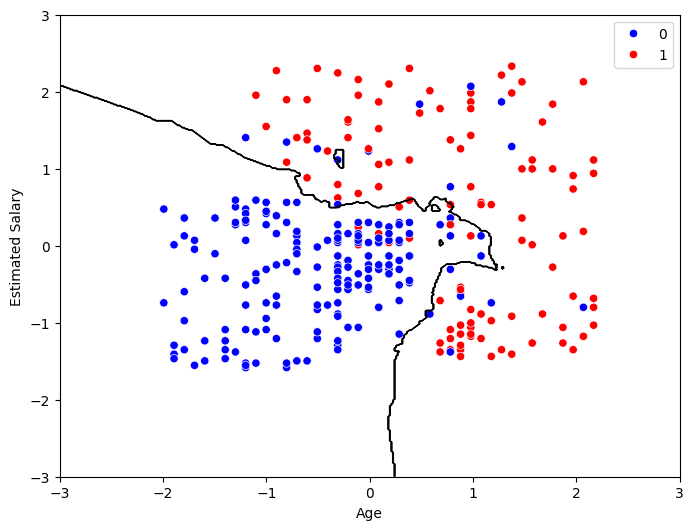

In [20]:
import seaborn as sns
plt.figure(figsize=(8,6))

#plt.contourf(x1,x2, z, cmap=plt.cm.coolwarm, alpha=0)
plt.contour(x1,x2, z, colors='black', linewidths=0.5)

sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train,palette={
    0:'blue', 1:'red'}, marker='o')

plt.xlabel('Age') #0 and 1 are indicators of whether purchased or not.
plt.ylabel('Estimated Salary')

plt.show()

trying to code this in vsd squadron pro board (in C) is an issue as the data set is large and the equation is not a simple line
If we have a smaller dataset its fine but, its not the case all the time.
#We can use another method called SVM (Support Verctor Machine)

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'linear',random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [41]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 90.00%


/tmp/ipython-input-352205090.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


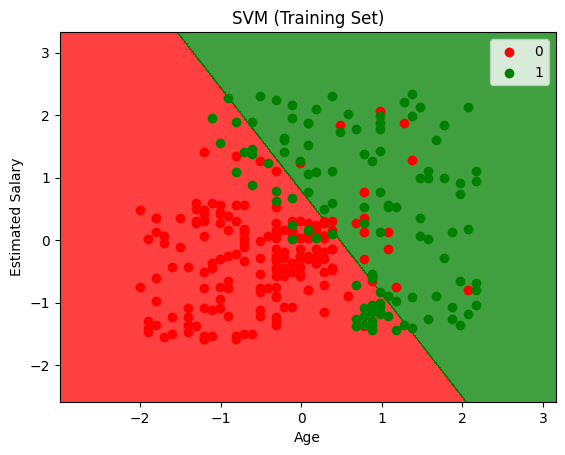

In [42]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1,x2 = np.meshgrid(np.arange(start= x_set[:,0].min() -1, stop = x_set[:,0].max()+1, step = 0.01),
                    np.arange(start= x_set[:,1].min() -1, stop = x_set[:,1].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap= ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
#svm can not just ddivide it into 2 prtts but multiple different sections


In [43]:
print(classifier.coef_)
print(classifier.intercept_)
#print(classifier.dual_coef_) #with rbf instead of inear
# we see that they both are an array, it is beacuse it is a plane/multidimensional

[[1.60291291 0.97138722]]
[-0.76862169]


In [44]:
weights = classifier.coef_
bias = classifier.intercept_


#write a ftn. to actually support all these weights and biases into a '.h' file, so we can import it to our SiFive project

In [50]:
with open("svm_model.h", "w") as f:
    f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
    f.write(f"#define NUM_FEATURES {weights.shape[1]}\n\n")


    f.write("double weights[NUM_CLASSES][NUM_FEATURES] = {\n")
    for row in weights:
        f.write("    {"+",".join(f"{v:.10f}" for v in row) + "},\n")
    f.write("};\n\n")

    f.write("double bias[NUM_CLASSES] = {"+", ".join(f"{b:.10f}" for b in bias) + "};\n")

print("Exported SVM model to svm_model.h")

Exported SVM model to svm_model.h


In [55]:
mean= sc.mean_
scale = sc.scale_
with open("scaler.h", "w") as f:
    f.write(f"#define NUM_FEATURES {len(mean)}\n\n")

    f.write("double scaler_mean[NUM_FEATURES] = {\n")
    f.write("    " + ", ".join(f"{m:.10f}" for m in mean) + "\n")
    f.write("};\n\n")

    f.write("double scaler_std[NUM_FEATURES] = {\n")
    f.write("    " + ", ".join(f"{s:.10f}" for s in scale) + "\n")
    f.write("};\n")

print("Exported scaler parameters to scaler.h")


Exported scaler parameters to scaler.h
